# Exploratory Data Analysis


## 1. Setup


### 1.1 Imports


In [1]:
from scripts.data_loader import load_data, split_features_targets
from scripts.preprocessor import remove_fillers, set_types, fill_missing
from scripts.feature_analysis import (
    plot_histogram,
    plot_line,
    plot_boxplot,
    plot_spatial_heatmap,
    create_heatmap_gif,
)
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Loading Dataset


In [2]:
# Load data into DataFrames.
data = load_data("data")
df = remove_fillers(data)
df = fill_missing(df, "mean")
df = set_types(
    df,
    {
        "x": int,
        "y": int,
        "year": int,
        "ice_mask": int,
    },
)
print(f"📊 Data: \n {df.head()}\n")
features, targets = split_features_targets(df)
boundary_conditions = ["precipitation", "air_temperature", "ocean_temperature"]

📊 Data: 
          x        y  ice_thickness  ice_velocity  ice_mask  precipitation  \
0 -3040000  3040000            0.0     85.009021         4     729.484314   
1 -2918400  3040000            0.0     85.009021         4     694.645996   
2 -2796800  3040000            0.0     85.009021         4     691.841736   
3 -2675200  3040000            0.0     85.009021         4     679.350647   
4 -2553600  3040000            0.0     85.009021         4     659.845520   

   air_temperature  ocean_temperature  year  
0       292.419525              275.5  2015  
1       273.800354              275.5  2015  
2       273.366791              275.5  2015  
3       272.888672              275.5  2015  
4       272.373596              275.5  2015  



## 2. Feature Space


### 2.1 NaN Values


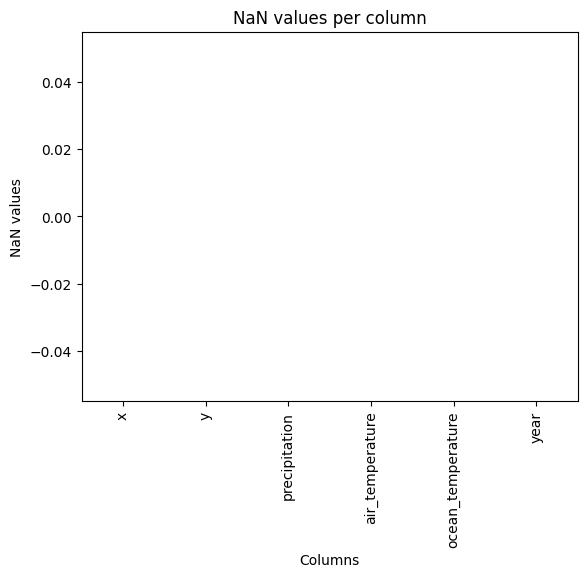

📊 NaN values per column: 
 x                    0
y                    0
precipitation        0
air_temperature      0
ocean_temperature    0
year                 0
dtype: int64



In [3]:
# Plot NaN values in each column
NaN_values = features.isna().sum()
sns.barplot(x=NaN_values.index, y=NaN_values.values)
plt.xticks(rotation=90)
plt.title("NaN values per column")
plt.xlabel("Columns")
plt.ylabel("NaN values")
plt.show()

print(f"📊 NaN values per column: \n {features.isna().sum()}\n")

### 2.2 Outliers


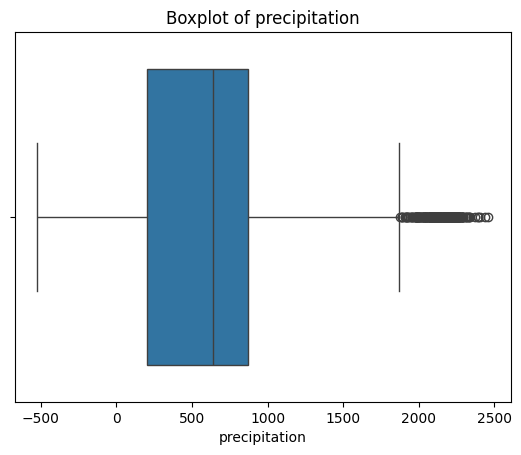

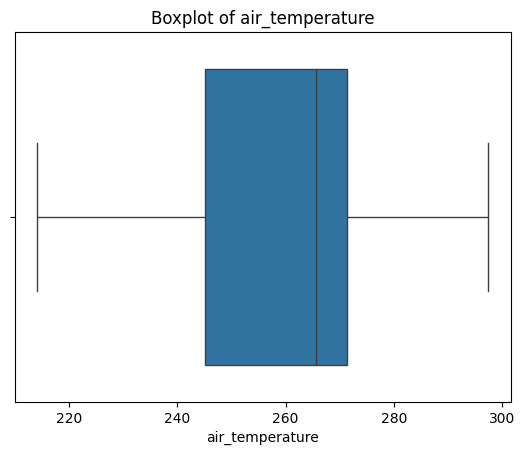

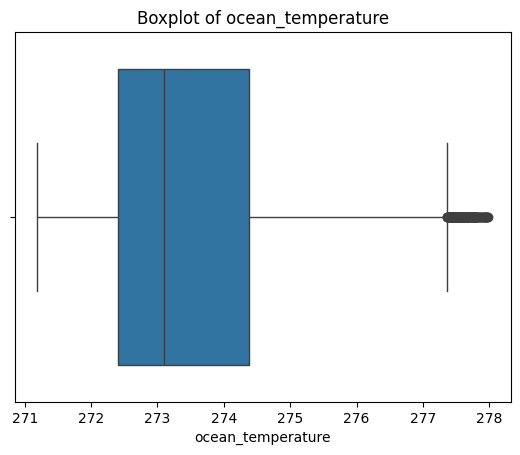

In [4]:
# plot a boxplot for each feature with seaborn
for feature in boundary_conditions:
    plot_boxplot(df, feature)

### 2.3 Duplicates


### 2.4 Univariate Analysis


📊
precipitation
819.790344    3
990.931152    3
623.367188    3
792.231812    3
653.311707    3
             ..
199.594467    1
146.790909    1
96.361366     1
72.099937     1
939.561768    1
Name: count, Length: 222683, dtype: int64



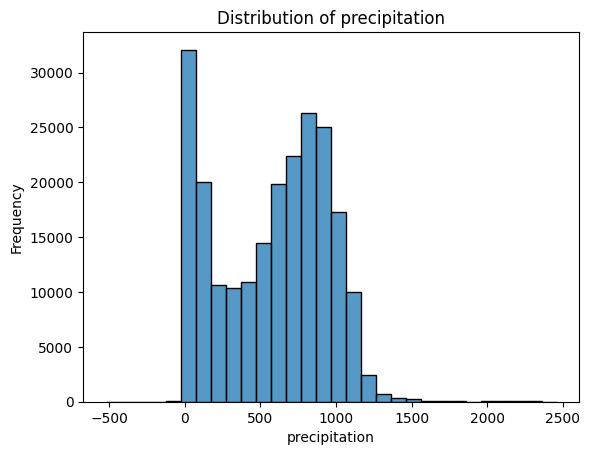

📊
air_temperature
267.263824    5
266.575928    5
267.067657    5
275.119934    5
266.871582    5
             ..
266.148804    1
265.933105    1
266.097260    1
268.920746    1
295.049957    1
Name: count, Length: 204118, dtype: int64



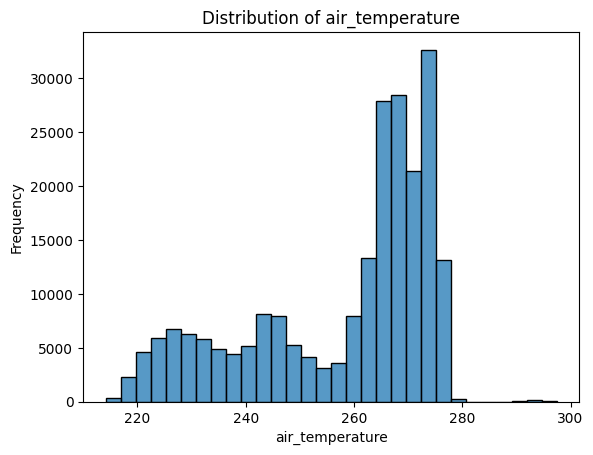

📊
ocean_temperature
275.500000    29585
272.445190       11
272.402008       10
272.751465       10
272.734894       10
              ...  
273.923431        1
274.323822        1
274.651764        1
274.454224        1
273.690125        1
Name: count, Length: 96719, dtype: int64



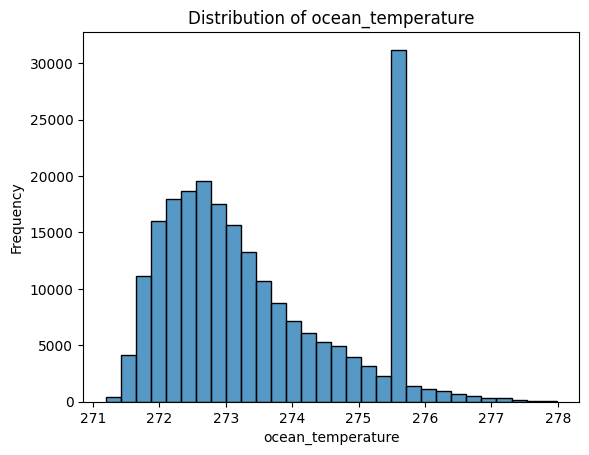

In [5]:
for column in boundary_conditions:
    plot_histogram(df, column)

📊
ice_thickness
0.000000       142451
2412.662842         3
3140.890869         3
2930.014648         3
2922.480469         3
                ...  
2664.730469         1
2557.804932         1
2566.216064         1
3746.208252         1
678.922079          1
Name: count, Length: 80910, dtype: int64



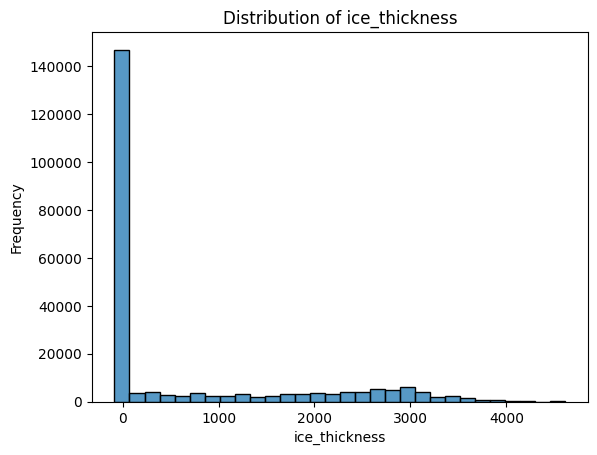

📊
ice_velocity
85.009021      144852
0.000000           28
1.899704            2
9.205718            2
4.601454            2
                ...  
31.310682           1
53.644230           1
62.764286           1
486.217010          1
1144.581909         1
Name: count, Length: 78766, dtype: int64



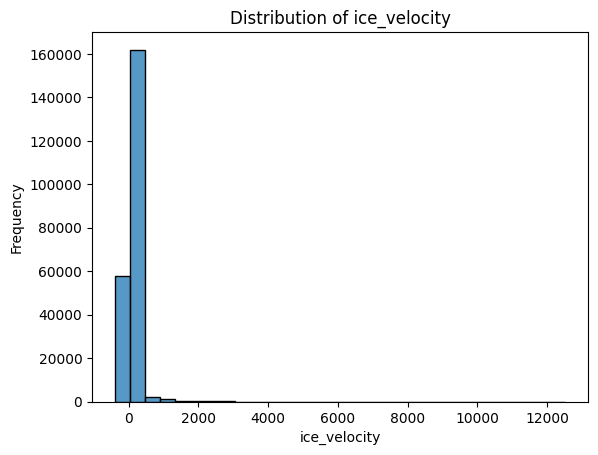

📊
ice_mask
4    143706
2     71595
3      6606
1      1635
0       144
Name: count, dtype: int64



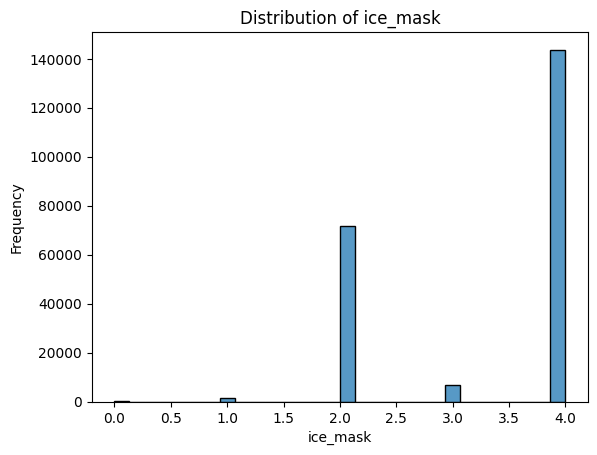

In [6]:
for column in targets.columns:
    plot_histogram(df, column)

### 2.5 Static Spatial Representations


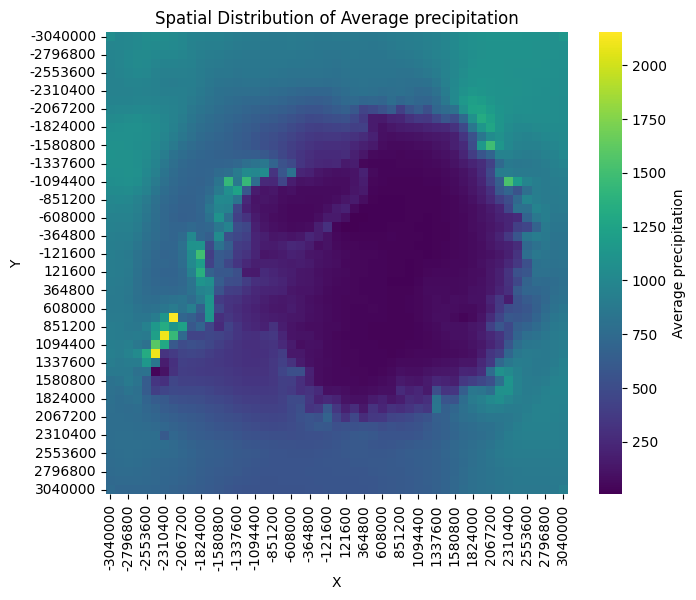

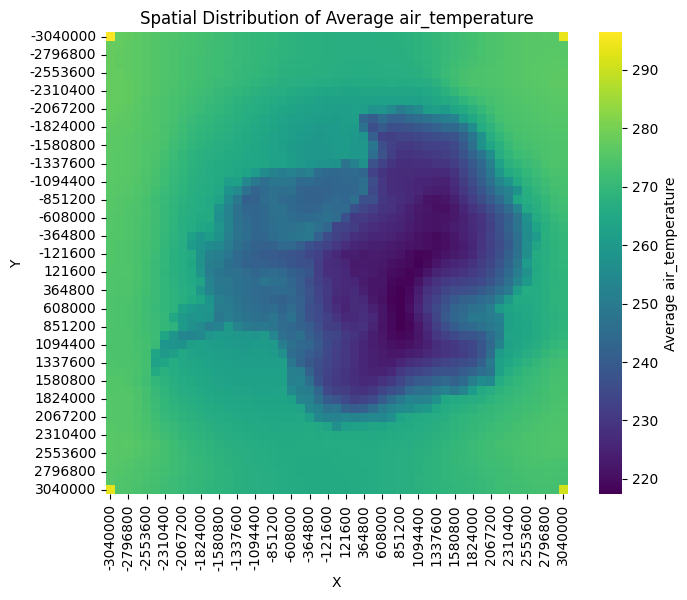

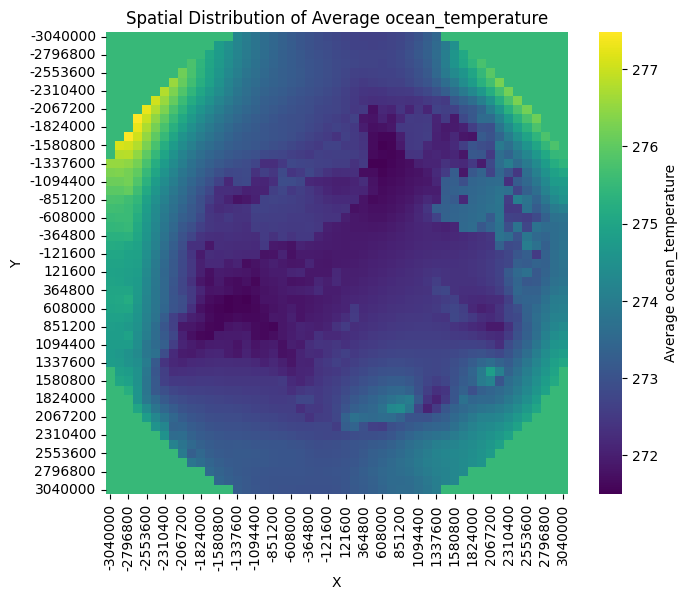

In [7]:
for column in boundary_conditions:
    plot_spatial_heatmap(df, column)

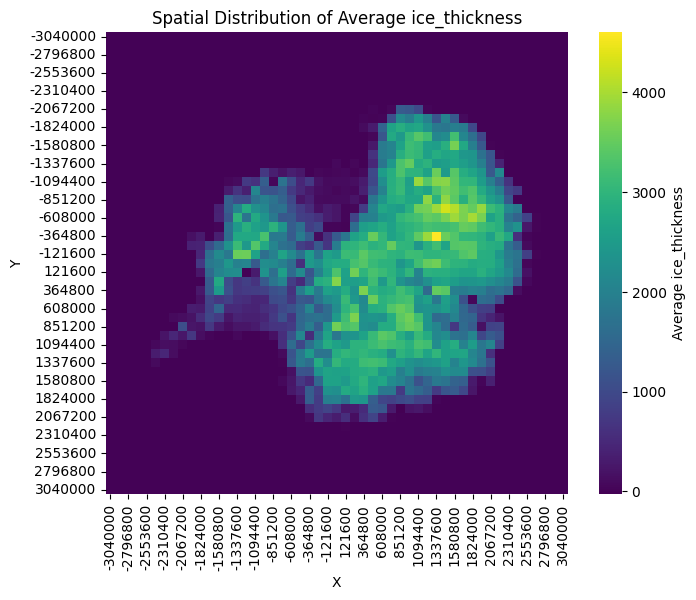

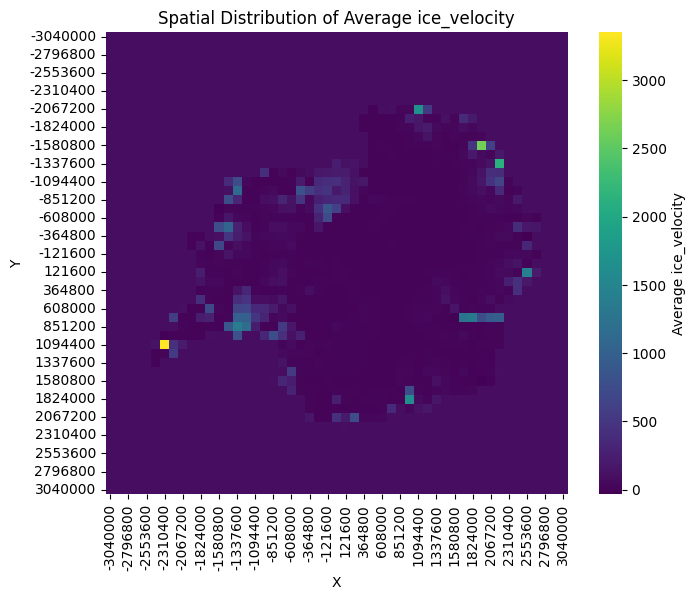

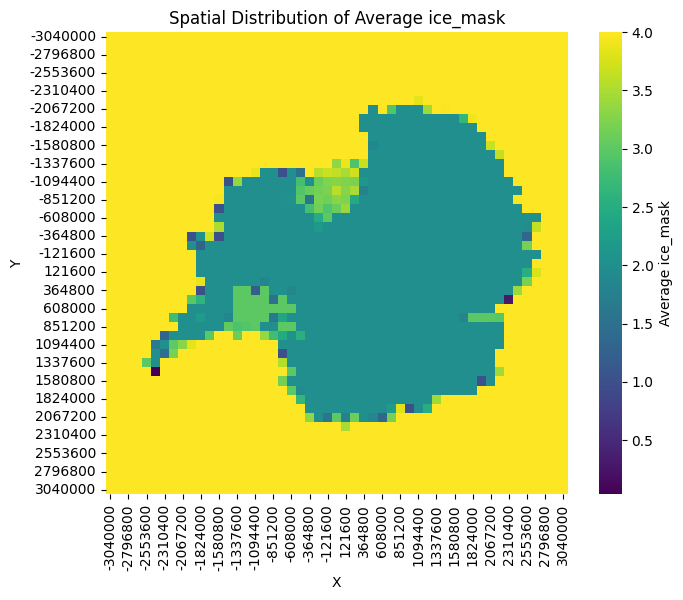

In [8]:
for column in targets.columns:
    plot_spatial_heatmap(df, column)

### 2.6 Dynamic Spatial Representations


In [9]:
for column in boundary_conditions:
    create_heatmap_gif(df, column)

In [10]:
for column in targets.columns:
    create_heatmap_gif(df, column)

### 2.7 Temporal Representations


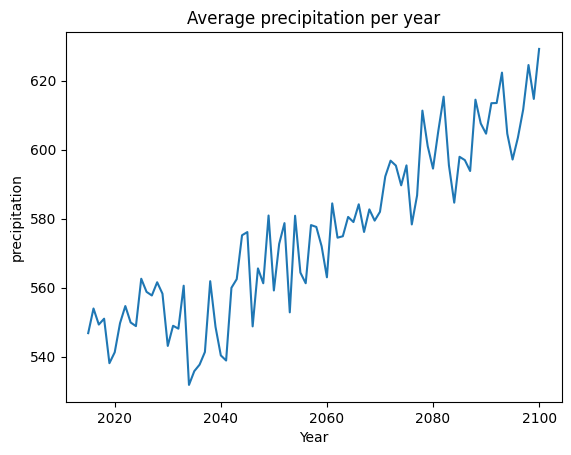

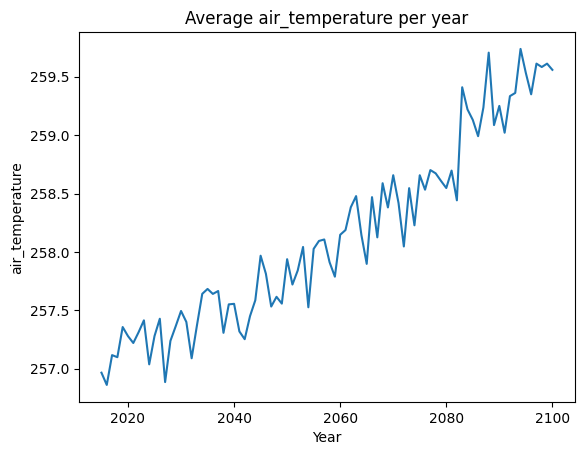

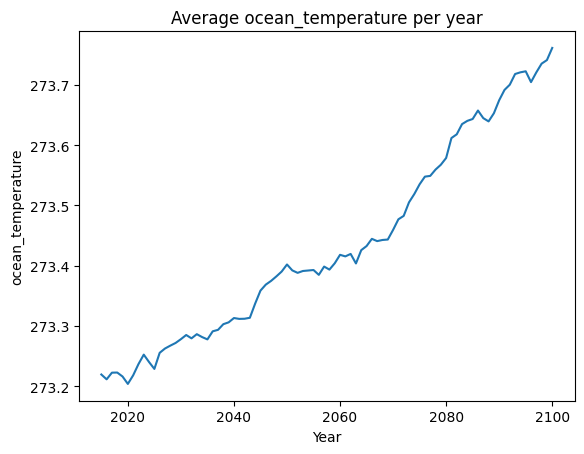

In [11]:
for feature in boundary_conditions:
    plot_line(df, feature)

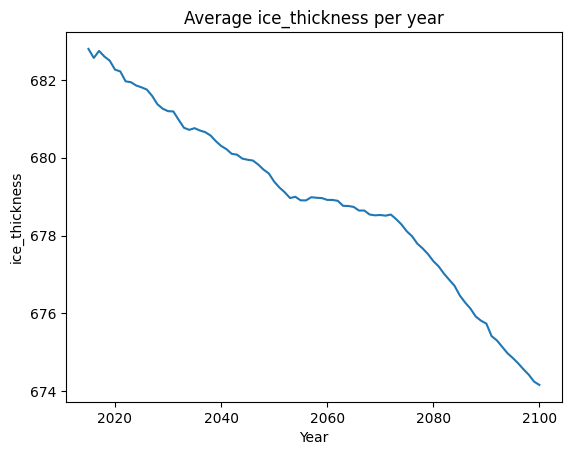

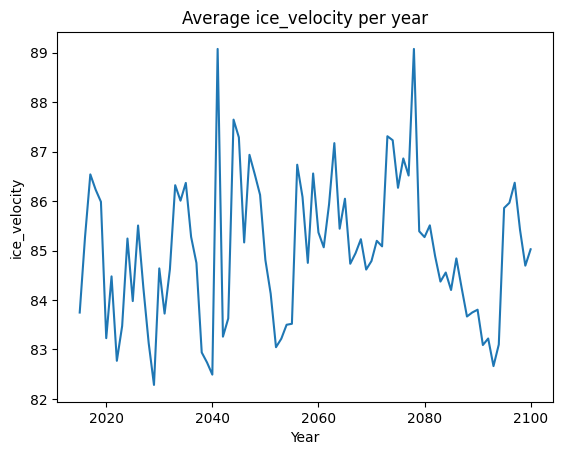

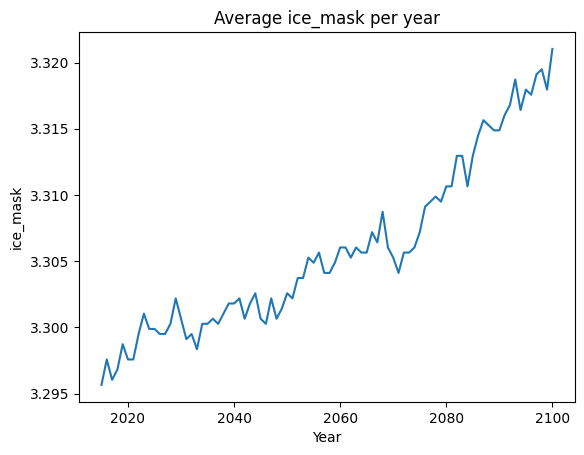

In [12]:
for target in targets.columns:
    plot_line(df, target)

## 3. Correlation Analysis


### 3.1 Bivariate Analysis _(Inter-Feature)_


<Axes: >

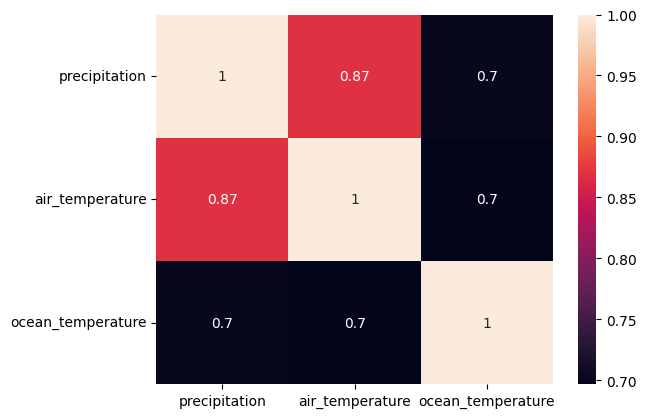

In [13]:
sns.heatmap(df[boundary_conditions].corr(), annot=True)

### 3.2 Bivariate Analysis _(Feature-Output)_


<Axes: >

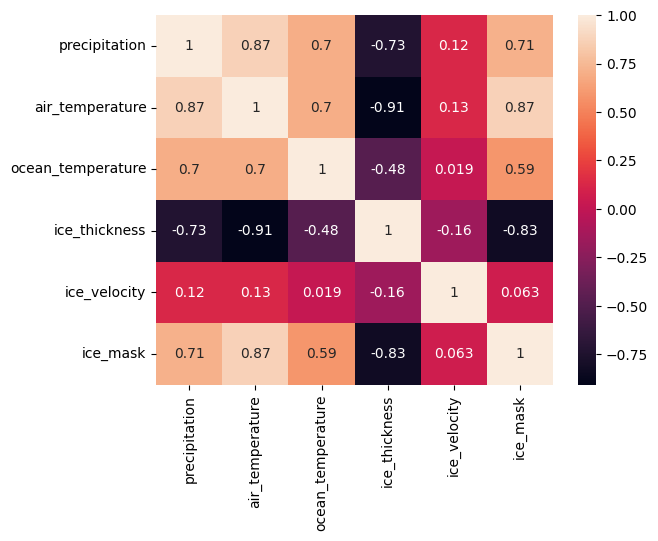

In [14]:
relevant_variables = boundary_conditions + targets.columns.tolist()
sns.heatmap(df[relevant_variables].corr(), annot=True)

### 3.3 Principle Component Analysis (PCA)


## 3. Feature Engineering


### 3.2 Feature Creation

-   distance to pole
-   derivatives over time
-   integrals
-   temp difference between air and temp
-   rolling averages
-   ice_velocity uses a fill value of -1 for areas of no ice, maybe one hot encode this?
-   similarly, ice_thickness uses a value of 0 for ocean
-   how to deal with ocean temperature values for land points?


### 3.3 Feature Analysis


### 3.4 Correlation Analysis


## 4. Stratification & Sampling


## 5. Summary
